# Тестирование классических методов Рунге-Кутты с постоянным шагом

In [1]:
push!(LOAD_PATH, pwd())
using RungeKutta

In [11]:
using PyPlot
using Printf
using LinearAlgebra

In [3]:
import LaTeXStrings: @L_str

Определим правую часть ОДУ линейного осциллятора, а также его аналитическое решение

\begin{equation}
    \left\{
    \begin{aligned}
        & \dot{x}_1(t) = -x_2(t),\\
        & \dot{x}_2(t) = +x_1(t)
    \end{aligned}
    \right.
\end{equation}

In [4]:
"""Правая часть ОДУ линейного осциллятора"""
function oscillator(t::Float64, x::Vector{Float64})::Vector{Float64}
    return [-x[2], x[1]]
end

"""Аналитическое решение ОДУ линейного осциллятора"""
function oscillator_solution(t::Float64, x_0::Vector{Float64})::Vector{Float64}
    return [x_0[1]*cos(t) - x_0[2]*sin(t),
            x_0[2]*cos(t) + x_0[1]*sin(t)]
end

oscillator_solution

In [5]:
x_0 = [1.0, 1.0]
t_start = 0.0
t_stop = 1e3
h = 0.01

0.01

In [6]:
log(10, (h^5)*t_stop)

-7.0

Протестируем все реализованные методы Рунге-Кутты на точность и на скорость. Для проверки погрешности используем аналитическое решение дифференциального уравнения линейного осциллятора.

In [12]:
for func in RK.functions
    print("Function "); printstyled(:red, string(func,"\n"))
    @time t, xn = RK.eval(func)(oscillator, x_0, h, t_start, t_stop, true)
    x = oscillator_solution(t, x_0)
    @printf("  err ≈ %g", norm(x - xn))
    @printf("  log(err) ≈ %.2f\n", log(10, norm(x - xn)))
end

Function redRKp2n1
  0.126912 seconds (1.00 M allocations: 91.553 MiB, 58.47% gc time)
  err ≈ 0.0235714  log(err) ≈ -1.63
Function redRKp2n2
  0.168721 seconds (1.13 M allocations: 89.779 MiB, 5.57% gc time)
  err ≈ 0.0235714  log(err) ≈ -1.63
Function redRKp2n3
  0.075692 seconds (1.03 M allocations: 93.055 MiB, 8.44% gc time)
  err ≈ 0.0235714  log(err) ≈ -1.63
Function redRKp3n1
  0.112389 seconds (1.64 M allocations: 148.394 MiB, 7.76% gc time)
  err ≈ 5.89243e-05  log(err) ≈ -4.23
Function redRKp3n2
  0.245556 seconds (2.01 M allocations: 170.171 MiB, 6.11% gc time)
  err ≈ 5.89243e-05  log(err) ≈ -4.23
Function redRKp3n3
  0.101990 seconds (1.44 M allocations: 130.026 MiB, 8.50% gc time)
  err ≈ 5.89243e-05  log(err) ≈ -4.23
Function redRKp3n4
  0.107878 seconds (1.54 M allocations: 139.366 MiB, 8.03% gc time)
  err ≈ 5.89243e-05  log(err) ≈ -4.23
Function redRKp4n1
  0.245028 seconds (2.37 M allocations: 200.268 MiB, 6.90% gc time)
  err ≈ 1.1677e-07  log(err) ≈ -6.93
Function 

In [13]:
t1 = time()
N = 10^2
for i in 1:N
    t, xn = RK.RKp4n4(oscillator, x_0, h, t_start, t_stop, true)
end
t2 = time()
println((t2-t1)/N)
@time t, xn = RK.RKp4n4(oscillator, x_0, h, t_start, t_stop, true)

0.10006301879882812
  0.101271 seconds (2.00 M allocations: 183.106 MiB, 13.92% gc time)


(1000.0, [-0.26450034935217664, 1.3892586376967193])

## Зависимость глобальной погрешности от шага

Протестируем набор наших методов на зависимость глобальной погрешности от величины шага $h$ и представим результаты в графическом виде. Для этого организуем два цикла, внешний цикл по названиям методов и внутренний цикл по размерам шагов из массива `steps`.

Аналогичный график ранее был получен для программ на Фортране.

In [14]:
N = 50
steps = [0.01*i for i in 1:N];

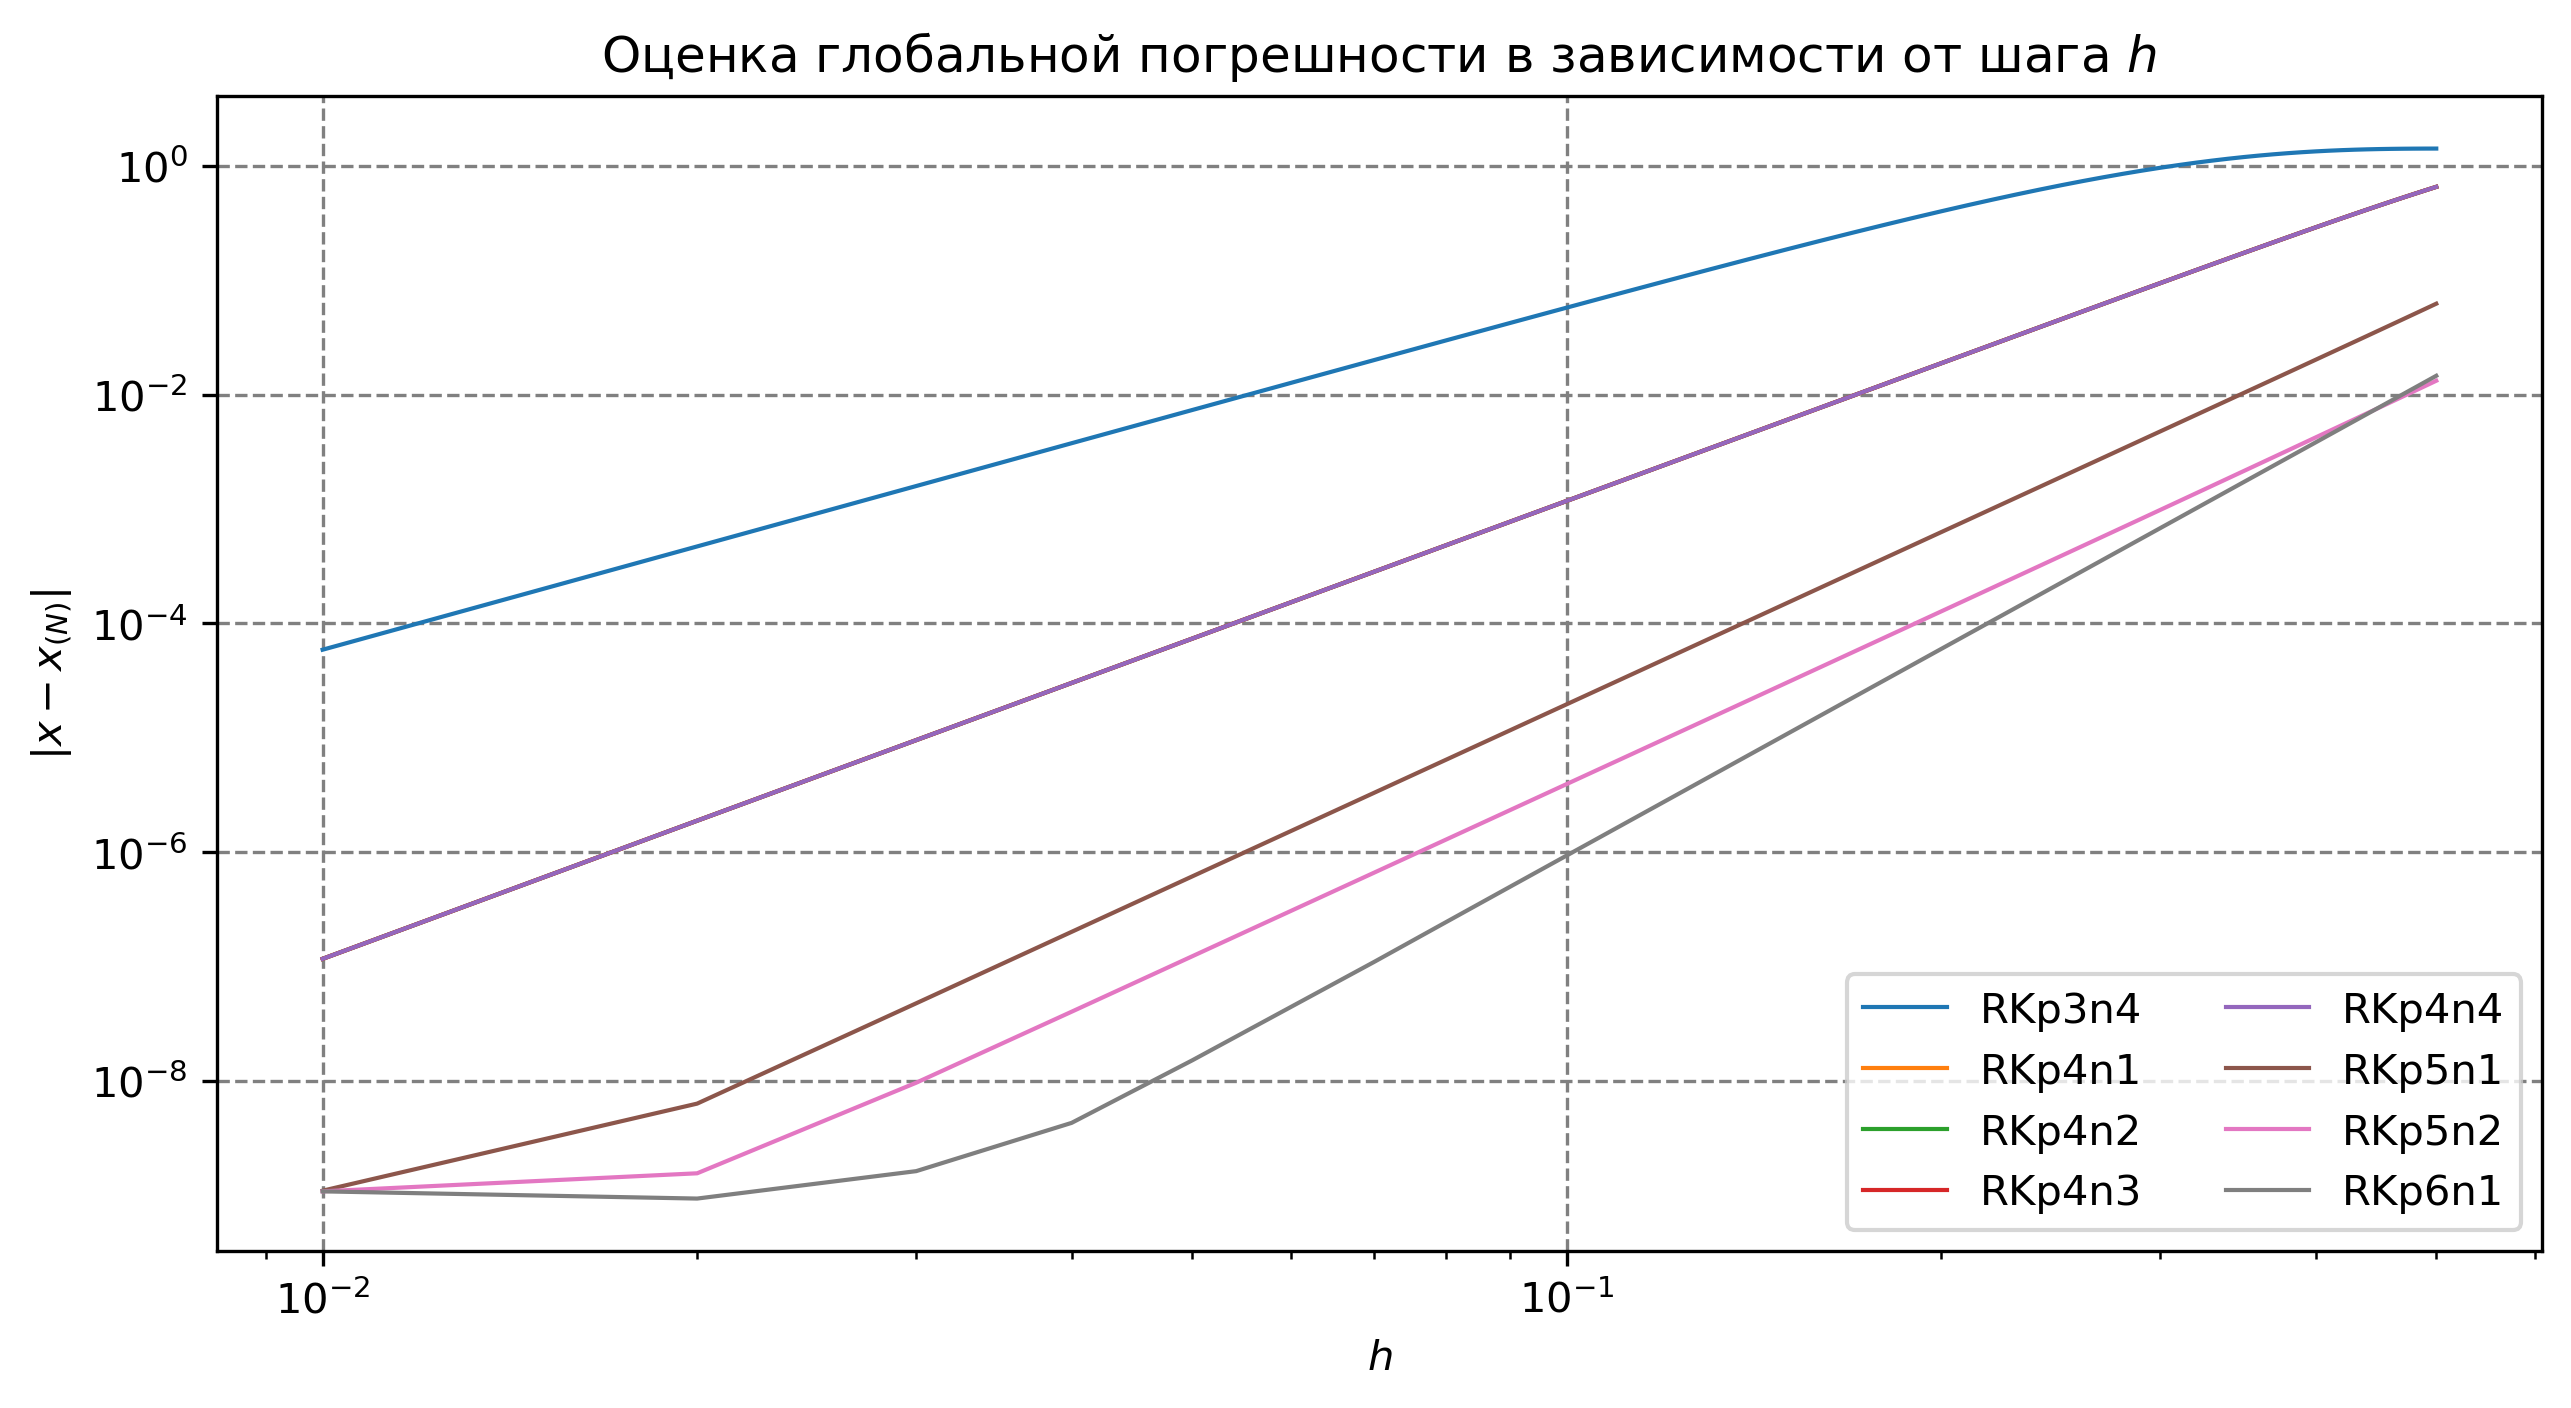

PyObject <matplotlib.legend.Legend object at 0x7ff0bcc092d0>

In [22]:
fig1 = PyPlot.figure(1, dpi=300, figsize=(10,5))
ax1 = fig1.add_subplot(1, 1, 1)


ax1.set_title(L"Оценка глобальной погрешности в зависимости от шага $h$")
ax1.set_xlabel(L"$h$")
ax1.set_ylabel(L"$\|x - x_{(N)}\|$")

ax1.grid(b=true, color="gray", linestyle="--")

for func in RK.functions[7:end]
    step_error = []
    for step in steps
        t, xn = RK.eval(func)(oscillator, x_0, step, t_start, t_stop, true)
        x = oscillator_solution(t, x_0)
        push!(step_error, norm(x - xn, 2))
    end
    ax1.plot(steps, step_error, label=string(func), lw=1.0)
end

ax1.set_yscale("log")
ax1.set_xscale("log")

ax1.legend(ncol=2, loc=4)

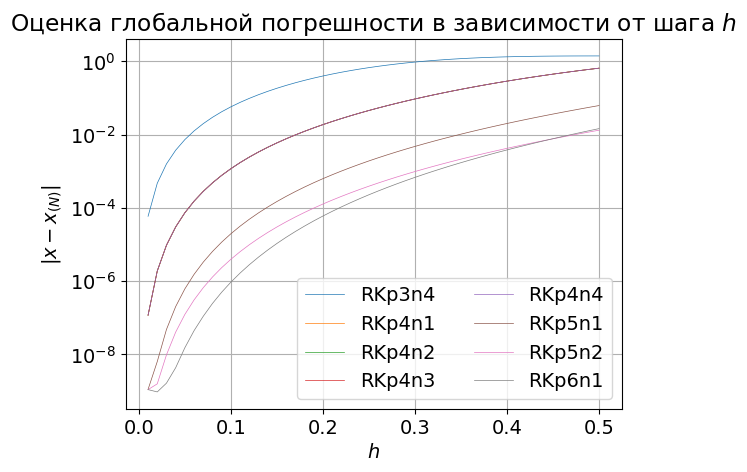

In [14]:
ax1.set_xscale]("linear")
ax1.set_yscale]("log")
fig1

In [14]:
fig1[:savefig]("RKa.pdf", format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.0)